Design fuzzy inference systems for the Restaurant Tipping and ABS Brake Systems problems.
Implement fuzzy logic rules and defuzzification to make decisions based on fuzzy inputs.

fuzzy inference systems (FIS) for the Restaurant Tipping and ABS Brake Systems problems. We'll implement fuzzy logic rules and defuzzification to make decisions based on fuzzy inputs.

Restaurant Tipping Problem
In the restaurant tipping problem, we'll use fuzzy logic to decide the tip amount based on the quality of service and the quality of food.

ABS Brake System Problem
In the ABS (Anti-lock Braking System) problem, we'll use fuzzy logic to decide the brake pressure based on the speed of the car and the wheel slip.

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=03853ec14d317830afbeba02fde3372fa676ed8c39fea03cffa4f8a6ac90693e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


**numpy:** Used for numerical operations.
**skfuzzy:** A Python library for fuzzy logic.
**skfuzzy.control:** Provides control systems for fuzzy logic.

Tip: 14.80
Brake: 50.00


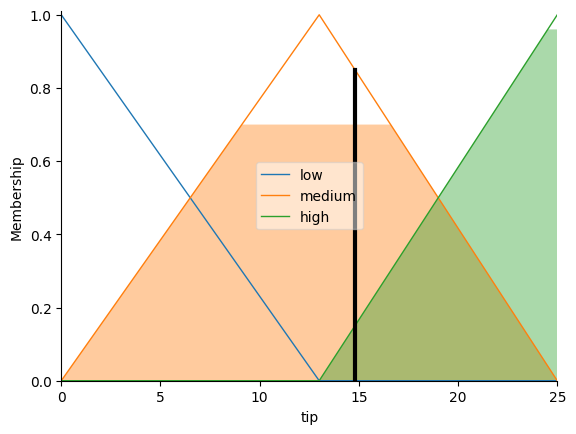

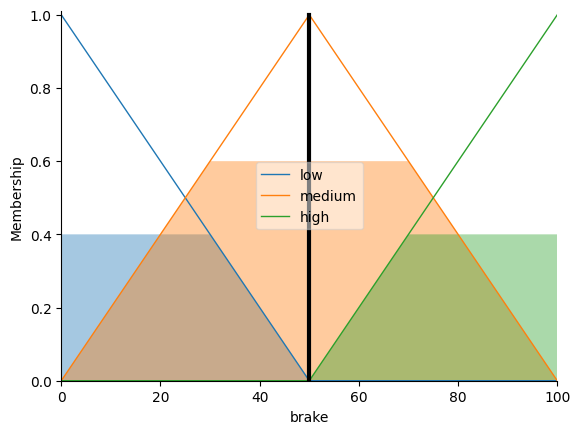

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Restaurant Tipping System
def restaurant_tipping():
    # Define input and output variables
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

    # Define membership functions
    service.automf(3)
    food.automf(3)
    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
    tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
    tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

    # Define fuzzy rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    # Create control system
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # Input values
    tipping.input['service'] = 6.5
    tipping.input['food'] = 9.8

    # Compute the result
    tipping.compute()

    # Print and visualize the result
    print(f"Tip: {tipping.output['tip']:.2f}")
    tip.view(sim=tipping)

# ABS Brake System
def abs_brake_system():
    # Define input and output variables
    speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 11, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

    # Define membership functions
    speed.automf(3)
    slip.automf(3)
    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [0, 50, 100])
    brake['high'] = fuzz.trimf(brake.universe, [50, 100, 100])

    # Define fuzzy rules
    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    # Create control system
    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # Input values
    braking.input['speed'] = 70
    braking.input['slip'] = 3

    # Compute the result
    braking.compute()

    # Print and visualize the result
    print(f"Brake: {braking.output['brake']:.2f}")
    brake.view(sim=braking)

# Run the systems
restaurant_tipping()
abs_brake_system()
plt.show()
